[0.55753333 0.55391114 0.55486964 0.56480255 0.55215618]
0.2877123150421943
0.7122876849578054


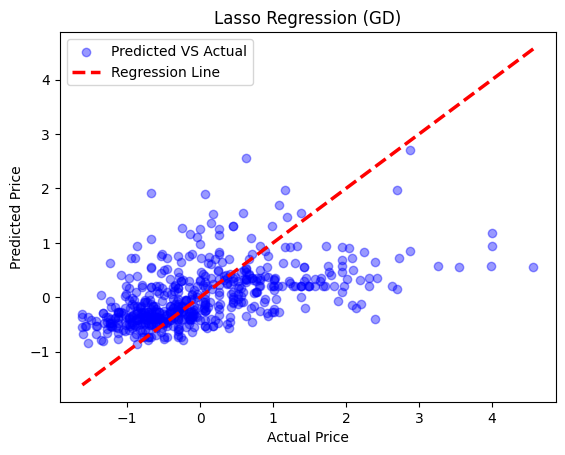

In [ ]:
# Lasso Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

csv=pd.read_csv('Housing.csv')
# print(csv.head())
x_preNormalized = np.array(
    csv[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
y_PreNormalized = np.array(csv['price'])
# applying z-score normalization
x = (x_preNormalized-np.mean(x_preNormalized))/np.std(x_preNormalized)
y = (y_PreNormalized-np.mean(y_PreNormalized))/np.std(y_PreNormalized)

# print(x.shape)

def lasso_GD(x,y,learning_rate, L,n_iteration):
    n = len(y)
    x_shape=x.shape
    beta_cofficient=np.zeros(x_shape[1])
    x_transpose = np.transpose(x)
    
    for i in range(n_iteration):
        y_predicted=np.dot(x,beta_cofficient)
        cost_fucntion=y_predicted-y
        # 1/n *(xT*cost fucntion)
        gradient=(1/n)*np.dot(x_transpose,cost_fucntion)
        # updating gradient
        z=beta_cofficient-(learning_rate*gradient)
        # updating beta cofficient
        beta_cofficient=np.sign(z)*np.maximum(np.abs(z)-learning_rate*L,0)

    return beta_cofficient

updated_beta_cofficient=lasso_GD(x,y,0.1,0.001,2000)
print(updated_beta_cofficient)

# predicting the value
y_predicted=np.dot(x,updated_beta_cofficient)

# model evaluation
r2 = r2_score(y, y_predicted)
mse = mean_squared_error(y, y_predicted)
print(r2)
print(mse)


# plotting
plt.scatter(y,y_predicted, color='blue',alpha=0.4,label='Predicted VS Actual')
plt.plot(y,y,'r--',lw=2.5, label="Regression Line")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression (GD)')
plt.legend()
plt.show()

    